# Course work

Task: Marketing campaigns are essential part of business. This is also true for banking services. Meanwhile estimation of marketing campaign preformance and prediction of performance is a challanging task. Based on historical data related to direct marketing campaigns of a Portuguese banking institution try to predict subscription for deposit before new marketing campaign.

Metrics:
As for subscription prediction we can't prefer precision either recall will use f1-score metric
*   f1-score maximization
*   f1-score >= 80%


Dataset for research available [here](https://archive.ics.uci.edu/dataset/222/bank+marketing)

In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib
plt = matplotlib.pyplot

print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"missingno: {msno.__version__}")
print(f"numpy: {np.__version__}")

pandas: 1.5.3
seaborn: 0.12.2
missingno: 0.5.2
numpy: 1.22.4


In [3]:
url = 'https://raw.githubusercontent.com/dmytrovelychko/rd_ds_python/main/datasets/bank-full.csv'
df = pd.read_csv(url, sep=";")
print(f"shape: {df.shape}")
df[:100]

shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Numerical features


In [36]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Notes:
- age, looks good            
- balance, looks good
- pdays, looks good, value -1 means not contacted
- previous, looks good     

Will not use data about contacs during current campaign, as need to perform prediciton before campaing starts:
- campaign, drop
- duration, drop (remove from prediction model as after call y is obiviously known)
- day, drop
- month, drop

In [4]:
df = df.drop(columns=["campaign", "duration", "day", "month"])
df.shape

(45211, 13)

In [5]:
df = df.drop_duplicates()
df.shape

(44400, 13)

<ipython-input-39-2d299eb40d82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-39-2d299eb40d82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");


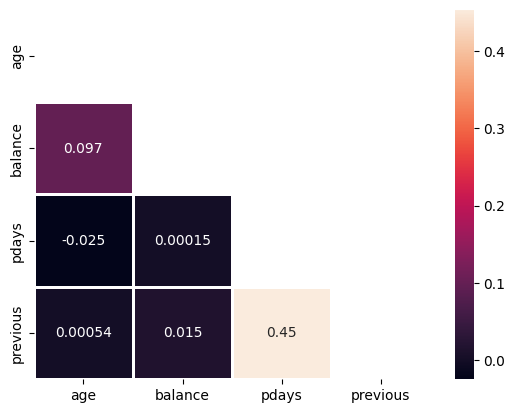

In [39]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

there is notable correlation between **pdays**: number of days that passed by after the client was last contacted from a previous
and **previous**: number of contacts performed before this campaign and for this client

age            Axes(0.125,0.11;0.168478x0.77)
balance     Axes(0.327174,0.11;0.168478x0.77)
pdays       Axes(0.529348,0.11;0.168478x0.77)
previous    Axes(0.731522,0.11;0.168478x0.77)
dtype: object

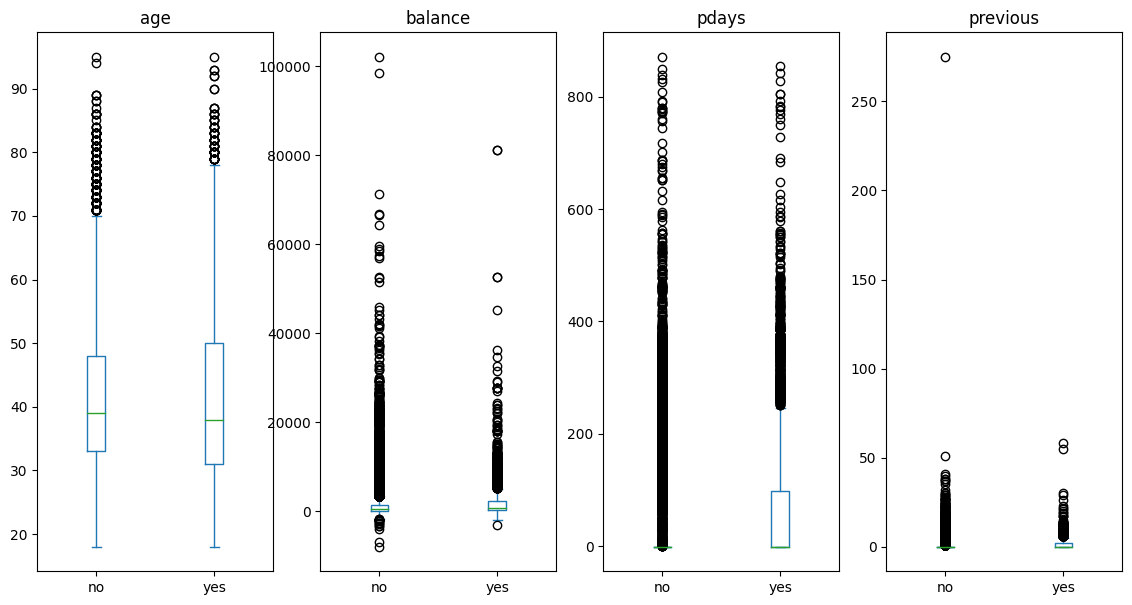

In [40]:
df.plot.box(by="y", figsize=(14,7))

We have outliers in all numerical features, let's look at the most extreme values

In [13]:
df[df["age"] > 90]

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome,y
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,-1,0,unknown,no
33699,95,retired,divorced,primary,no,2282,no,no,telephone,-1,0,unknown,yes
41663,95,retired,married,secondary,no,0,no,no,telephone,-1,0,unknown,no
41934,92,retired,married,unknown,no,775,no,no,cellular,-1,0,unknown,yes
42727,92,retired,married,unknown,no,775,no,no,cellular,96,3,success,yes
44262,93,retired,married,unknown,no,775,no,no,cellular,177,7,success,yes
44420,93,retired,married,unknown,no,775,no,no,cellular,13,9,success,yes


In [6]:
df[df["balance"] > 80000]

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome,y
26227,59,management,married,tertiary,no,98417,no,no,telephone,-1,0,unknown,no
39989,51,management,single,tertiary,no,102127,no,no,cellular,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,94,3,success,yes


seems reasonable, data looks valid

In [8]:
df[df["previous"] > 50]

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome,y
28886,31,management,single,tertiary,no,358,yes,no,cellular,256,51,failure,no
29182,40,management,married,tertiary,no,543,yes,no,cellular,262,275,other,no
38326,46,blue-collar,married,primary,no,1085,yes,yes,cellular,353,58,other,yes
44089,37,technician,married,secondary,no,432,yes,no,cellular,776,55,failure,yes


previous    Axes(0.125,0.11;0.775x0.77)
dtype: object

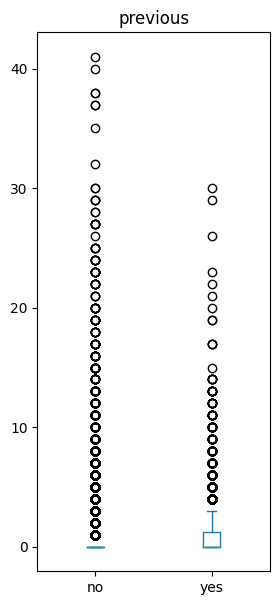

In [12]:
df[df["previous"] <= 50][["previous", "y"]].plot.box(by="y", figsize=(3,7))

Don't see any reasons to tackle outliers of age, balance and previous as invalid data or edge cases. But amount of them is very small, so will skip for now any treatment, but if choosen ml algorithm will be sensitive to outliers or can't reach metrics goal will try winsorizing.

If previous == 0, pdays == -1. Let's check if we have invalid records:

In [19]:
df[df["previous"] == 0][df["pdays"] != -1].shape

<ipython-input-19-9a576e7a501a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["previous"] == 0][df["pdays"] != -1].shape


(0, 13)

In [20]:
df[df["previous"] != 0][df["pdays"] == -1].shape

<ipython-input-20-bb0de9c3c156>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["previous"] != 0][df["pdays"] == -1].shape


(0, 13)

all good

### Categorical features

In [42]:
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "y"]

In [45]:
for col in cat_cols:
  print(df[col].value_counts(), '\n')

blue-collar      9570
management       9153
technician       7426
admin.           5111
services         4102
retired          2238
self-employed    1573
entrepreneur     1479
unemployed       1297
housemaid        1228
student           936
unknown           287
Name: job, dtype: int64 

married     26655
single      12585
divorced     5160
Name: marital, dtype: int64 

secondary    22831
tertiary     12961
primary       6757
unknown       1851
Name: education, dtype: int64 

no     43588
yes      812
Name: default, dtype: int64 

yes    24796
no     19604
Name: housing, dtype: int64 

no     37188
yes     7212
Name: loan, dtype: int64 

cellular     28655
unknown      12849
telephone     2896
Name: contact, dtype: int64 

unknown    36148
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 

no     39118
yes     5282
Name: y, dtype: int64 



Categorical feature labeling type:
* job          nominal label
* marital      nominal label
* education    ordinal label
* default      nominal label
* housing      nominal label
* loan         nominal label
* contact      nominal label
* poutcome     nominal label
* y            nominal label

Our target feature is pretty unbalanced, need to take this in acount during test/train split. Target feature is categorical, model should solve classification task.

Besides that there are plenty records with unknown.

In [ ]:
sns.pairplot(data=penguins, hue="species");

In [ ]:
# TODO What to do with unknown?
# - delete
# - set to mean/mode
# - predict
# TODO candidates algorithm for model (forest etc)
Logistic regression
Decision tree
Random forest
Support vector machine
K nearest neighbours
Naive Bayes

Ansamble of models?
# TODO hyperparameter optimization
# TODO Cross validation strategy?
# TODO Confusion matrix

порахувати тренувальні, валідаційні і тестові метрики

зробити висновки з коротким описом, чому обрали саме ту чи іншу модель,
метрики, проаналізувати, як вдалося покращити результати протягом валідації